# Schelling's Segregation Model

In this part of the assignment, you will get some practice with Python and learn about a class economic model. The model that we will explore here is based on "Models of Segregation," by Thomas C Schelling, published in the American Economic Review. As described on QuantEcon.org,

> In 1969, Thomas C. Schelling developed a simple but striking model of racial segregation [Sch69]. His model studies the dynamics of racially mixed neighborhoods. Like much of Schelling’s work, the model shows how local interactions can lead to surprising aggregate structure. In particular, it shows that relatively mild preference for neighbors of similar race can lead in aggregate to the collapse of mixed neighborhoods, and high levels of segregation.

> In recognition of this and other research, Schelling was awarded the 2005 Nobel Prize in Economic Sciences (joint with Robert Aumann).

**Grading: 4 points for each part**

In this assignment, please do the following:

 1. Read and do your best to understand Schelling's segregation model as described in the QuantEcon lecture: https://lectures.quantecon.org/py/schelling.html 
 2. Simulate Schelling's Segregation Model where the parameters are defined as

    ```python
    num_of_type_0 = 250
    num_of_type_1 = 250
    num_neighbors = 10      # Number of agents regarded as neighbors
    require_same_type = 5   # Want at least this many neighbors to be same type
    ```
    You are encouraged to use the code provided on QuantEcon, but you can write your own if you like. Describe what is surprising about the outcome of this simulation. Plot the distribution of agents after the algorithm converges.
    
 3. Simulate Schelling's Segregation Model again, but let `require_same_type = 0`. How long does it take to converge and why?
 4. Simulate Schelling's Segregation Model again, but let `require_same_type = 3`. How do the results compare to the case where `require_same_type = 5`?
 5. Adjust your code so that there are now 3 types. Let the third type be referred to as type 2. Plot type 2 individual's as purple dots. Let there be 250 of type 2. There should now be 750 total individuals in the simulation. Run the simulation with the parameters
    ```python
    num_of_type_0 = 250
    num_of_type_1 = 250
    num_of_type_2 = 250
    num_neighbors = 10      # Number of agents regarded as neighbors
    require_same_type = 5   # Want at least this many neighbors to be same type
    ```
  Note that you only need to add several lines of code to the QuantEcon solution to acheive this. 
 6. Summarize the key lesson we can learn from this model. 

In [1]:
from random import uniform, seed
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
class Agent:

    def __init__(self, type):
        self.type = type
        self.draw_location()

    def draw_location(self):
        self.location = uniform(0, 1), uniform(0, 1)

    def get_distance(self, other):
        "Computes euclidean distance between self and other agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        "True if sufficient number of nearest neighbors are of the same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()


def plot_distribution(agents, cycle_num):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    x_values_2, y_values_2 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        elif agent.type == 1:
            x_values_1.append(x)
            y_values_1.append(y)
        else:
            x_values_2.append(x)
            y_values_2.append(y)
            
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize' : 8, 'alpha' : 0.6}
    ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange',  **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    ax.plot(x_values_2, y_values_2, 'o', markerfacecolor='purple', **plot_args)
    ax.set_title('Cycle {}'.format(cycle_num - 1))
    plt.show()

In [3]:
seed(10)  # for reproducible random numbers

# 1. Read lecture

# 2. 

Entering loop  1
Entering loop  2
Entering loop  3
Entering loop  4
Entering loop  5
Entering loop  6
Entering loop  7


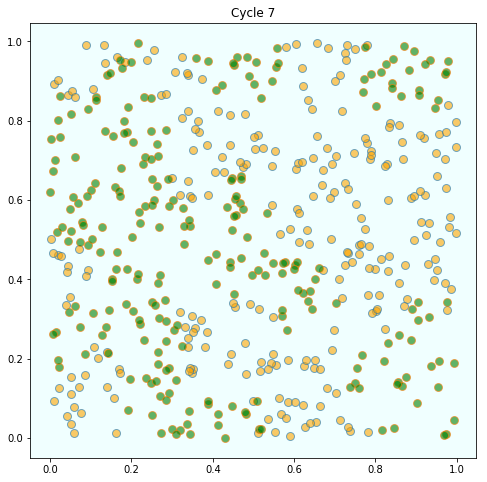

Converged, terminating.


In [10]:
# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 4   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))


count = 1
# ==  Loop until none wishes to move == #
while 1:
    print('Entering loop ', count)

    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

plot_distribution(agents, count)
print('Converged, terminating.')

# 3

The algorithm converges immediately because everyone is happy with any configuration.

Entering loop  1


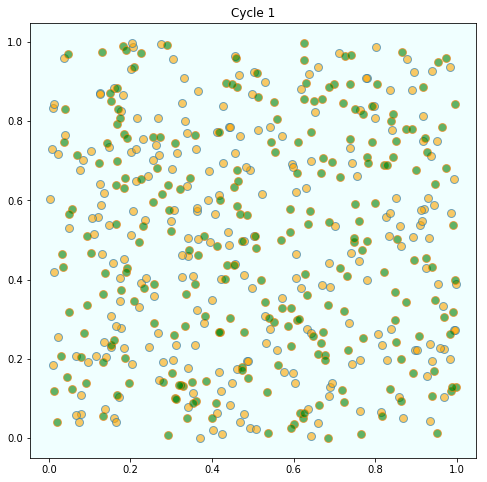

Converged, terminating.


In [5]:
# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 0   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))


count = 1
# ==  Loop until none wishes to move == #
while 1:
    print('Entering loop ', count)

    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

plot_distribution(agents, count)
print('Converged, terminating.')

# 4.

Entering loop  1
Entering loop  2
Entering loop  3
Entering loop  4
Entering loop  5


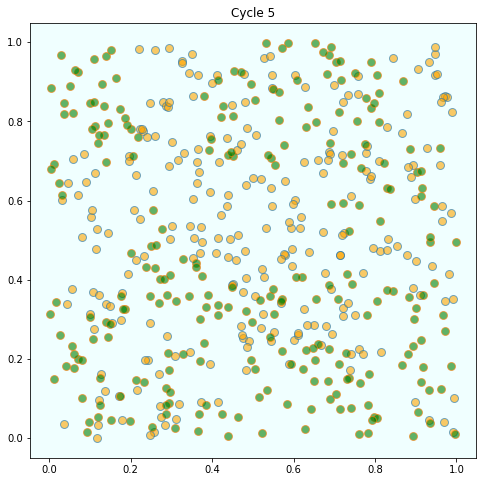

Converged, terminating.


In [6]:
# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 3   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))


count = 1
# ==  Loop until none wishes to move == #
while 1:
    print('Entering loop ', count)

    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

plot_distribution(agents, count)
print('Converged, terminating.')

# 5. Three Types


Entering loop  1
Entering loop  2
Entering loop  3
Entering loop  4
Entering loop  5


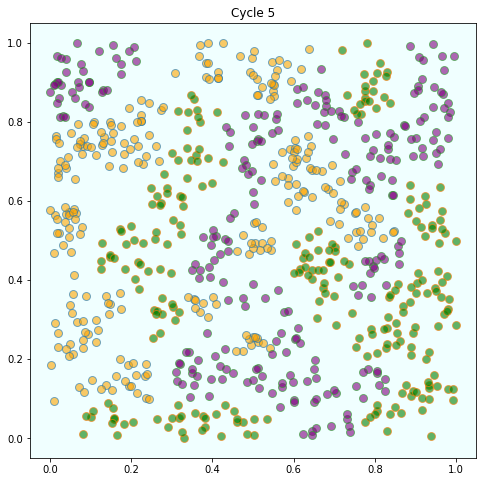

Converged, terminating.


In [7]:
# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_of_type_2 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))
agents.extend(Agent(2) for i in range(num_of_type_2))


count = 1
# ==  Loop until none wishes to move == #
while 1:
    print('Entering loop ', count)

    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

plot_distribution(agents, count)
print('Converged, terminating.')

# 6. Key lesson

The key lesson is that even rather mild preference for one's own type can result in fairly extremely segregated neighborhoods.